# 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import glob
import copy
import numpy as np
import scipy.misc as scpm
%matplotlib inline

In [2]:
modelar = pd.read_csv('data/Modelar_UH2019.txt', sep="|")
estimar = pd.read_csv('data/Estimar_UH2019.txt', sep="|")

print('Modelar:', modelar.shape, 'Estimar:', estimar.shape)

Modelar: (9958, 53) Estimar: (1104, 52)


In [3]:
modelar.head()

,HY_id,HY_cod_postal,HY_provincia,HY_descripcion,HY_distribucion,HY_tipo,HY_antiguedad,HY_metros_utiles,HY_metros_totales,HY_num_banos,...,IDEA_unitprice_rent_residential,IDEA_price_rent_residential,IDEA_stock_rent_residential,IDEA_demand_rent_residential,GA_page_views,GA_mean_bounce,GA_exit_rate,GA_quincena_ini,GA_quincena_ult,TARGET
0,6028499,18151,Granada,Plaza de Garaje ubicada en la planta sótano de...,NaN,Garaje,NaN,NaN,35.00,0,...,5.09,626.38,237.0,51.01,71,7.14,10.65,2,46,32.16
1,6028500,29915,Málaga,NaN,NaN,Casa de pueblo,NaN,NaN,151.98,2,...,4.08,700.00,6.0,50.69,684,16.36,5.25,1,47,30.71
2,6028502,3740,Alicante,El inmueble(piso) se encuentra situado en el d...,VIVIENDA-PISO,Piso,2008.0,92.58,102.78,1,...,4.43,525.00,15.0,51.82,651,15.12,11.21,1,47,63.48
3,6028512,30592,Murcia,Plaza de garaje situada en la planta semisótan...,NaN,Garaje,NaN,11.81,12.46,0,...,5.03,863.17,168.0,50.74,92,15.82,14.55,2,47,108.27
4,6028513,30592,Murcia,Plaza de garaje situada en la planta semisótan...,NaN,Garaje,NaN,14.29,15.43,0,...,5.03,863.17,168.0,50.74,3,0.00,0.00,2,39,7.50


### Bulk image loading functions

In [4]:
width, height= 60,60
def load_images(filenames):
    images =np.asarray([cv2.resize(scpm.imread(file, mode= 'RGB'),(width,height)) for file in filenames])
    return images
def load_images2(path):
    filenames= sorted(glob.glob(path))[0:10]
    images =np.asarray([cv2.resize(scpm.imread(file, mode= 'RGB'),(width,height)) for file in filenames])
    return images

In [6]:
names = sorted(glob.glob('imagenes_inmuebles_haya/*.jpg'))


C:\Users\Rohit\AppData\Local\conda\conda\envs\py36\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """


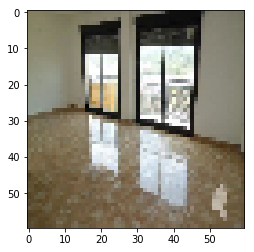

In [21]:
%matplotlib inline
images=load_images2('imagenes_inmuebles_haya/*.jpg')
images[0].shape
plt.imshow(images[8])

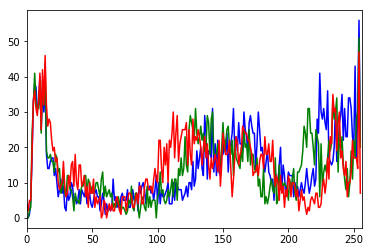

In [19]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([images[0]],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

In [22]:
lista=[]
for i in range(len(names)):
    lista.append(names[i][24:31])
    
df= pd.DataFrame(lista,columns=['HY_id'])
df['HY_id']=df['HY_id'].astype(int)
df=df.set_index('HY_id')

df2=modelar[['HY_id','TARGET']]
df2=df2.set_index('HY_id')

result=pd.merge(df, df2, how='left', on='HY_id')
result.head(10)

,TARGET
HY_id,
6028499,32.16
6028499,32.16
6028499,32.16
6028499,32.16
6028499,32.16
6028500,30.71
6028500,30.71
6028500,30.71
6028502,63.48


In [35]:
import math 

y=result['TARGET'].as_matrix()
print('Total:',len(y),len(names))

predict_X_names=[]
tt_X_names=[]
tt_Y=[]

for i in range(len(y)):
    if math.isnan(y[i]):
        predict_X_names.append(names[i])
    else:
        if y[i]<125:
            tt_X_names.append(names[i])
            tt_Y.append(y[i])
print('\n','For training/test:',len(tt_X_names))
print(' For predicting:',len(predict_X_names))
print(' Discarded:',len(y)-len(tt_Y)-len(predict_X_names))


Total: 47381 47381

 For training/test: 37863
 For predicting: 4745
 Discarded: 4773


C:\Users\Rohit\AppData\Local\conda\conda\envs\py36\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [36]:
print(len(predict_X_names),len(tt_X_names),len(tt_Y))


4745 37863 37863


In [37]:
train_X=load_images(tt_X_names)

C:\Users\Rohit\AppData\Local\conda\conda\envs\py36\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [38]:
train_Y=tt_Y

(array([10869.,     0.,     0.,  9659.,     0.,     0.,  8597.,     0.,
            0.,  8738.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

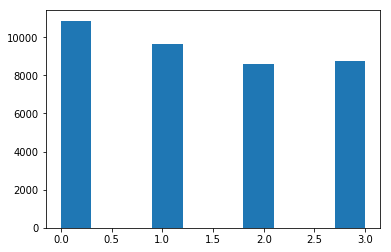

In [55]:
#categorical Y:

trainc_Y=[]
for i in tt_Y:
    if i<40:
        trainc_Y.append(0)
    elif i<60:
        trainc_Y.append(1)
    elif i<80:
        trainc_Y.append(2)
    else:
        trainc_Y.append(3)
plt.hist(trainc_Y)


In [68]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras import optimizers
import numpy as np
from keras.layers.core import Lambda
from keras import backend as K
from keras import regularizers
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping, ModelCheckpoint

batch_size    = 128
epochs        = 100
iterations    = 391
num_classes   = 4
dropout       = 0.5
weight_decay  = 0.0001


from keras import backend as K
if('tensorflow' == K.backend()):
    import tensorflow as tf
    from keras.backend.tensorflow_backend import set_session
    config = tf.ConfigProto()
    config.gpu_options.allow_growth = True
    sess = tf.Session(config=config)


weight_decay  = 0.0001

model = Sequential()

model.add(Conv2D(64, (3, 3), padding='same',input_shape=(60,60,3),kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(512,kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.load_weights('cifar10vgg.h5',by_name=True)

sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='mean_squared_error',metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_53 (Conv2D)           (None, 60, 60, 64)        1792      
_________________________________________________________________
activation_61 (Activation)   (None, 60, 60, 64)        0         
_________________________________________________________________
batch_normalization_57 (Batc (None, 60, 60, 64)        256       
_________________________________________________________________
dropout_41 (Dropout)         (None, 60, 60, 64)        0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 60, 60, 64)        36928     
_________________________________________________________________
activation_62 (Activation)   (None, 60, 60, 64)        0         
_________________________________________________________________
batch_normalization_58 (Batc (None, 60, 60, 64)        256       
__________

In [70]:
def train(nnmodel, batch, epochs, train_XY, validation_XY, test_XY):
    
    start = time.time()
    history = nnmodel.fit(train_XY[0], train_XY[1], batch_size=batch, epochs=epochs, verbose=1, validation_data=validation_XY)
    end = time.time()

    loss, acc = nnmodel.evaluate(test_XY[0], test_XY[1], verbose=0)
    print('Test loss:', loss)
    print('Test accuracy:', acc)

    plot_model_history(history)
    print("Training MLP took " + str(end - start) + " seconds")

    
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # Summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [63]:
from sklearn.model_selection import train_test_split

t_X, val_X, t_y, val_y = train_test_split(train_X,train_Y,train_size=0.70, random_state=0)

C:\Users\Rohit\AppData\Local\conda\conda\envs\py36\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [64]:

'''
####################
For Categorical CNN:
#####################
'''

from sklearn.model_selection import train_test_split

t_X, val_X, t_y, val_y = train_test_split(train_X,trainc_Y,train_size=0.70, random_state=0)

C:\Users\Rohit\AppData\Local\conda\conda\envs\py36\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [65]:
num_classes=4
# Data preprocessing 1
X_train = t_X.astype('float32')
X_test = val_X.astype('float32')
X_train /= 255.0
X_test /= 255.0

from keras.utils import np_utils
Y_train = np_utils.to_categorical(np.asarray(t_y), num_classes)
Y_test = np_utils.to_categorical(np.asarray(val_y), num_classes)

In [69]:
import time
train(model,100,20,(X_train,Y_train),(X_test,Y_test),(X_test,Y_test))

Train on 26504 samples, validate on 11359 samples
Epoch 1/20
26504/26504 [==============================] - 123s 5ms/step - loss: 0.7500 - acc: 0.2606 - val_loss: 0.7160 - val_acc: 0.2577
Epoch 2/20
26504/26504 [==============================] - 116s 4ms/step - loss: 0.6929 - acc: 0.2626 - val_loss: 0.6620 - val_acc: 0.2430
Epoch 3/20
26504/26504 [==============================] - 116s 4ms/step - loss: 0.6421 - acc: 0.2677 - val_loss: 0.6121 - val_acc: 0.2520
Epoch 4/20
26504/26504 [==============================] - 116s 4ms/step - loss: 0.5950 - acc: 0.2748 - val_loss: 0.5855 - val_acc: 0.2744
Epoch 5/20
26504/26504 [==============================] - 222s 8ms/step - loss: 0.5552 - acc: 0.2814 - val_loss: 0.5499 - val_acc: 0.2866
Epoch 6/20
26504/26504 [==============================] - 167s 6ms/step - loss: 0.5179 - acc: 0.2895 - val_loss: 0.5638 - val_acc: 0.2843
Epoch 7/20
26504/26504 [==============================] - 160s 6ms/step - loss: 0.4903 - acc: 0.2760 - val_loss: 0.5020 - 

NameError: name 'plot_model_history' is not defined

Train on 26504 samples, validate on 11359 samples
Epoch 1/20
26504/26504 [==============================] - 128s 5ms/step - loss: 0.3605 - acc: 0.2792 - val_loss: 0.3519 - val_acc: 0.2763
Epoch 2/20
26504/26504 [==============================] - 117s 4ms/step - loss: 0.3449 - acc: 0.2805 - val_loss: 0.3327 - val_acc: 0.2993
Epoch 3/20
26504/26504 [==============================] - 120s 5ms/step - loss: 0.3307 - acc: 0.2808 - val_loss: 0.3199 - val_acc: 0.3006
Epoch 4/20
26504/26504 [==============================] - 122s 5ms/step - loss: 0.3171 - acc: 0.2863 - val_loss: 0.3108 - val_acc: 0.2541
Epoch 5/20
26504/26504 [==============================] - 124s 5ms/step - loss: 0.3130 - acc: 0.2678 - val_loss: 0.3042 - val_acc: 0.2866
Epoch 6/20
26504/26504 [==============================] - 125s 5ms/step - loss: 0.3021 - acc: 0.2761 - val_loss: 0.2935 - val_acc: 0.2928
Epoch 7/20
26504/26504 [==============================] - 125s 5ms/step - loss: 0.2919 - acc: 0.2786 - val_loss: 0.2837 - 

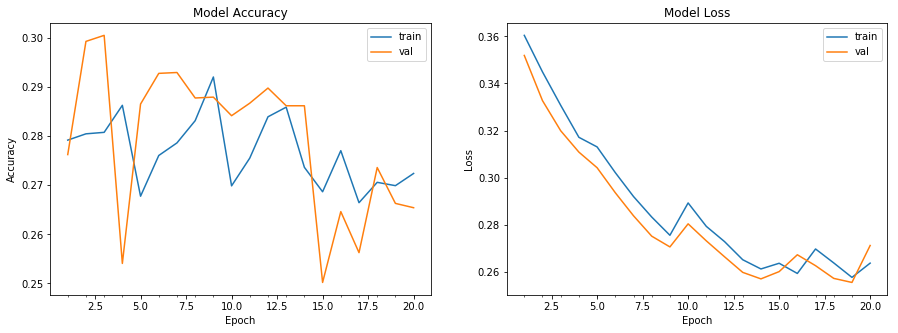

Training MLP took 2485.7858035564423 seconds


In [71]:
train(model,100,20,(X_train,Y_train),(X_test,Y_test),(X_test,Y_test))

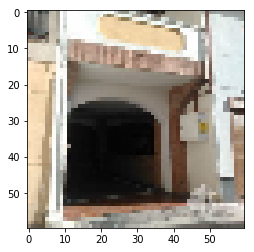

In [78]:
plt.imshow(train_X[0])

In [85]:
import cv2

gray = cv2.cvtColor(train_X[0],cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)

minLineLength = 100
maxLineGap = 10
lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,maxLineGap)
   

None


In [106]:
train_X_edge=train_X[:,:,:,0]
for i in range(len(train_X)):
    gray = cv2.cvtColor(train_X[i],cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray,50,150,apertureSize = 3)
    train_X_edge[i]=edges
    

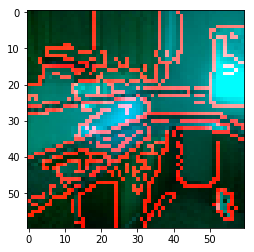

In [108]:
plt.imshow(train_X[80])

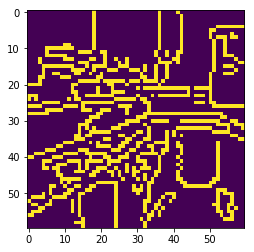

In [107]:
plt.imshow(train_X_edge[80])